# 10장 - 딥러닝 모델 설계하기 (폐암 수술 환자의 생존율 예측하기)

In [1]:
# 케라스 api 호출
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 라이브러리 호출
import numpy as np

In [2]:
# 깃허브 데이터 가져오기
!git clone https://github.com/taehojo/data.git

Cloning into 'data'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 21 (delta 3), reused 20 (delta 2), pack-reused 0
Unpacking objects: 100% (21/21), 460.93 KiB | 3.34 MiB/s, done.


In [3]:
# 수술 환자 데이터 불러오기
# csv 파일의 delimiter는 comma
Data_set = np.loadtxt("/content/data/ThoraricSurgery3.csv", delimiter=",")

In [4]:
# 환자의 진찰 기록 X로 지정(쉼표 기준으로 앞은 행. 뒤는 열의 범위가 입력됨)
# 모든 행의 1번째 열부터 16번째 열까지 가져오라는 뜻
X = Data_set[:,0:16]

# 수술 1년 후 사망/생존 여부를 y로 지정 (0은 사망, 1은 생존)
y = Data_set[:,16]

###2. 입력층, 은닉층, 출력층
- `Sequential()` : 딥러닝의 구조를 짜고, 층을 설정하는 부분 [(더 알아보기)](https://keras.io/ko/getting-started/sequential-model-guide/)
- `model.add(Dense(30, input_dim = 16, activation = 'relu'))` : 은닉층 + 입력층
  - `Dense()` : 함수의 첫 번째 인자에 몇 개의 노드를 본 층에 만들 것인지 정함
  - **노드(30개의 노드)** : 가중합, 이전 층에서 전달된 변수, 가중치, 바이어스의 모임
  - **input_dim** : 입력 데이터에서 몇 개의 값을 가져올지 정함
    - 첫 은닉층에 input_dim을 적어, 첫 Dense가 은닉층 + 입력층 역할
    - 즉, 데이터에서 값을 16개 받아, 은닉층의 노드 30개로 보낸다는 의미
- `model.add(Dense(1, activation='sigmoid'))` : 출력층 (마지막 층)
  - 출력 값을 하나로 정해 보여줘야 하므로 노드 1개(Dense(1))
  - 활성화 함수(sigmoid) 거쳐 최종 출력값

In [5]:
# 딥러닝 모델 구조 결정
model = Sequential() # 입력층과 출력층 사이에 은닉층들을 차곡차곡 추가하며 학습
model.add(Dense(30, input_dim = 16, activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))

###3. 모델 컴파일
- `model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])`
- 앞서 지정한 모델이 효과적으로 구현될 수 있게 여러 환경 설정하며 컴파일하는 부분
- 오차 함수(손실 함수) 결정
  - 평균 제곱 오차(선형 회귀) or 교차 엔트로피 오차(로지스틱 회귀)
  - 이 모델에서는 생존과 사망 중 하나를 예측하므로 교차 엔트로피 오차 함수 적용
  - 선형 회귀 모델 = 평균 제곱 계열 중 하나 사용
  - 이항 분류 = `binary_crossentropy` 사용
  - 다항 분류 = `categorical_crossentropy` 사용
  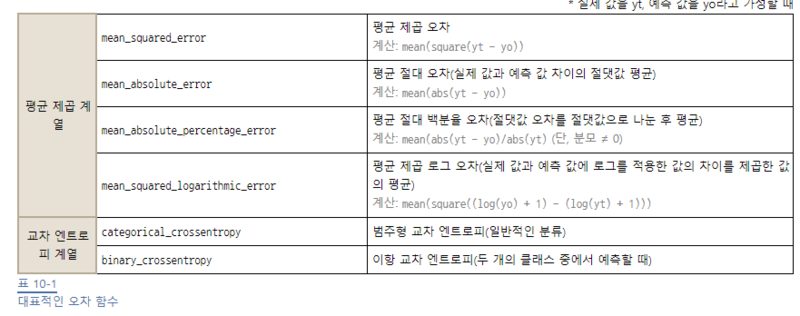

- 옵티마이저 선택
 - `adam` : 가장 많이 사용하는 옵티마이저
 - `(optimizer='adam').metrics()` : 모델 컴파일될 때 모델 수행의 결과를 나타내줌
 - `accuracy` : 학습셋에 대한 정확도에 기반해 결과 출력 (14장 참고)

### 4. 모델 실행하기
- `model.fit` : 컴파일 단계에서 정해진 환경을 주어진 데이터를 불러 실행시킴
- cf. 폐암 환자의 생존율 예측 데이터 용어 정리
  - 총 470명의 환자에게 16개의 정보(속성) 정리
  - 생존 여부(class), 가로 한 줄에 해당하는 환자의 정보(sample)
- `1 epoch` : 학습 프로세스가 모든 샘플에 대해 한 번 실행되는 것
  - `epochs = 5` : 각 샘플이 처음부터 끝까지 다섯 번 재사용될 때까지 실행 반복
- `batch_size` : 샘플을 한 번에 몇 개씩 처리할지 정함
  - `batch_size = 16` : 470개의 샘플을 16개씩 끊어서 집어넣기
  - 너무 크면 학습 속도가 느려지고, 너무 작으면 실행 값의 편차가 생겨 전체 결괏값의 불안정 초래
  - 컴퓨터 메모리가 감당할 만큼의 batch_size 찾아 설정!

In [6]:
# 딥러닝 모델 실행
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
history = model.fit(X, y, epochs = 5, batch_size = 16)

Epoch 1/5
30/30 [==============================] - 6s 4ms/step - loss: 1.4168 - accuracy: 0.5574
Epoch 2/5
30/30 [==============================] - 0s 3ms/step - loss: 0.5187 - accuracy: 0.8511
Epoch 3/5
30/30 [==============================] - 0s 3ms/step - loss: 0.4500 - accuracy: 0.8489
Epoch 4/5
30/30 [==============================] - 0s 3ms/step - loss: 0.4553 - accuracy: 0.8489
Epoch 5/5
30/30 [==============================] - 0s 3ms/step - loss: 0.4489 - accuracy: 0.8489
